# Probability models for random samples


#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from ministats import gen_samples
from ministats import plot_samples
from ministats import plot_samples_panel
from ministats import plot_sampling_dist
from ministats import plot_sampling_dists_panel

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 3)},
)
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/prob/random_samples"  # where to save figures

from ministats.utils import savefigure

<Figure size 640x480 with 0 Axes>

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Definitions

- $X$: a random variable with probability distribution $f_X$
- $\mathbf{X} = (X_1,X_2,X_3, \ldots, X_n)$: *random sample* of size $n$.
  Each $X_i$ is independent copy of the random variable $X \sim f_X$.
- $\mathbf{x} = (x_1,x_2, \ldots, x_n)$: a *particular sample*,
    which consists of $n$ observations from the distribution $f_X$.
- **statistic**: any function computed from a particular sample $\mathbf{x}$.
- **sampling distribution of statistic**:
    the variability of a statistic when computed on a random sample $\mathbf{X}$

## Sample statistics

A statistics is any function we compute from a sample $\mathbf{x}$.

Examples of sample statistics:
- sample mean $\overline{\mathbf{x}} = \frac{1}{n}\sum_{i=1}^n x_i$
- sample variance $s^2 = \frac{1}{n-1}\sum_{i=1}^n \left(x_i-\overline{\mathbf{x}}\right)^2$
- median $F_{\mathbf{x}}^{-1}(\frac{1}{2})$, where $F_{\mathbf{x}}^{-1}$ is the inverse of the empirical CDF.
- 90th percentile $F_{\mathbf{x}}^{-1}(0.9)$


### Sample mean

Let's focus on the sample mean:

$$
  \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i = \texttt{mean(} \mathbf{x} \texttt{)}
$$


In [4]:
def mean(sample):
    """
    Compute the mean of the values in `sample`.
    """
    return sum(sample) / len(sample)

In [5]:
mean([1,3,11])

5.0

### Example 1U: Samples from a uniform distribution


In [6]:
from scipy.stats import uniform
rvU = uniform(0,1)

### Example 1Z: Samples from the standard normal


In [7]:
from scipy.stats import norm
rvZ = norm(0,1)

### Example 1E: Samples from the exponential distribution


In [8]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0, 1/lam)

### Law of large numbers

TODO: demo of some sort as sample size increases

maybe using all three examples...

## Sampling distribution of the mean

Consider any function $g$ computed based on a sample of size $n$.
We'll talk about the sample mean (defined as the Python function `mean` above),
but the concept applies to any function $g$.

Functions computed from samples are called *statistics*.
you're already familiar with several of these functions (mean, variance, standard deviation).
For now we'll keep calling them functions to make the connection with math concept of a function cleared, and also to facilitate the hands-on calculations using Python functions.

Given the random sample $\mathbf{X}$,
the quantity  $g(\mathbf{X})$ is a random variable. 
This should make sense intuitively,
since the inputs to the function $\mathbf{X}$ are random, the output of the function is also random.

The probability distribution of the random variable $g(\mathbf{X})$ is called the **sampling distribution** of $g$.

### Generating observations from the sampling distribution of the mean

The function `gen_sampling_dist_of_mean` generates `N` samples of size `n`
from the random variable object `rv` and calculates the mean of each of the samples.
The function returns a lists of the means calculated from each sample.

We can plot a histogram of the sampling distribution
by calling `sns.histplot(stats)`.
We can also generate a strip plot using `sns.stripplot(x=stats, marker="D")`,
specifying the `D` (diamond) marker to indicate we are plotting the means from each sample.

The plot helper function `plot_sampling_dist(stats)` generates a combined plot that
shows both a histogram and a scatter plot,
as shown in the figures below.

### Example 1: sampling distribution of $\mathbf{Mean}(\mathbf{U})$

In this example,
we'll study the sampling distribution of the $\mathbf{Mean}$ statistic
computed from samples of the form $\mathbf{U} = (U_1, U_2, \ldots, U_n)$,
where each $U_i$ is an instance of the standard uniform random variable $U \sim \mathcal{U}(0,1)$.

We can create a computer model `rvU` for the random variable $U \sim \mathcal{U}(0,1)$
by initializing an instance of the `uniform` family of distributions defined in `scipy.stats`.

In [9]:
from scipy.stats import uniform
rvU = uniform(0,1)

We can now generate observations of the random sample $\mathbf{U} = (U_1, U_2, \ldots, U_n)$
by calling the method `rvU.rvs(n)`,
which generates a sequence of `n` observations of the random variable $U$.

In [10]:
rvU.rvs(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [11]:
n = 30
usample = rvU.rvs(n)
usample

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203])

In [12]:
mean(usample)

np.float64(0.43678769367056164)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

Saved figure to figures/prob/random_samples/samples_from_U01.pdf
Saved figure to figures/prob/random_samples/samples_from_U01.png


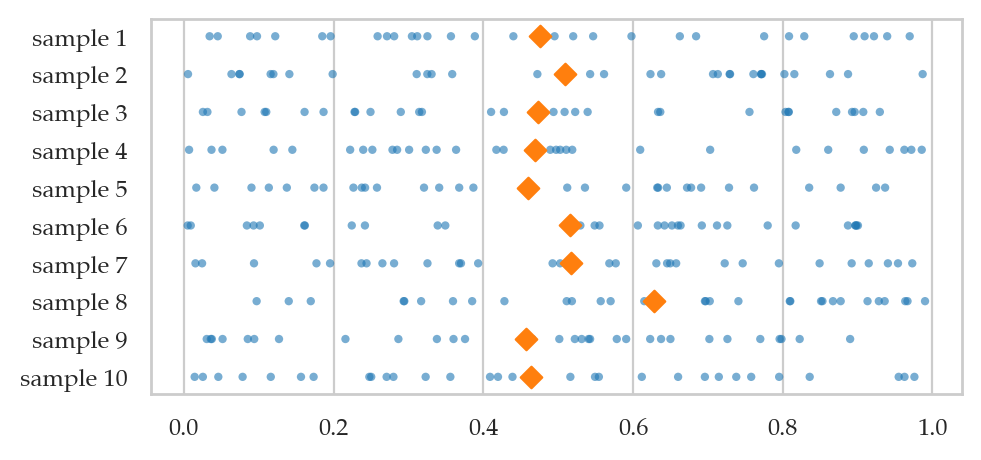

In [13]:
filename = os.path.join(DESTDIR, "samples_from_U01.pdf")
usamples_df = gen_samples(rvU, n=30, N=10)
plot_samples(usamples_df, filename=filename, figsize=(5,2.4));

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \ldots, \mathbf{u}_N$, compute the mean of each sample to form a list of observations `ubars` = $[\overline{\mathbf{u}}_1, \overline{\mathbf{u}}_2, \overline{\mathbf{u}}_3, \ldots, \overline{\mathbf{u}}_N]$.

In [14]:
N = 1000  # number of samples
n = 30    # sample size

ubars = []
for j in range(N):
    usample = rvU.rvs(n)
    ubar = mean(usample)
    ubars.append(ubar)

We can now plot a histogram of the observations from the sampling distribution we have `ubars`.

Saved figure to figures/prob/random_samples/sampling_dist_of_Ubar.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Ubar.png


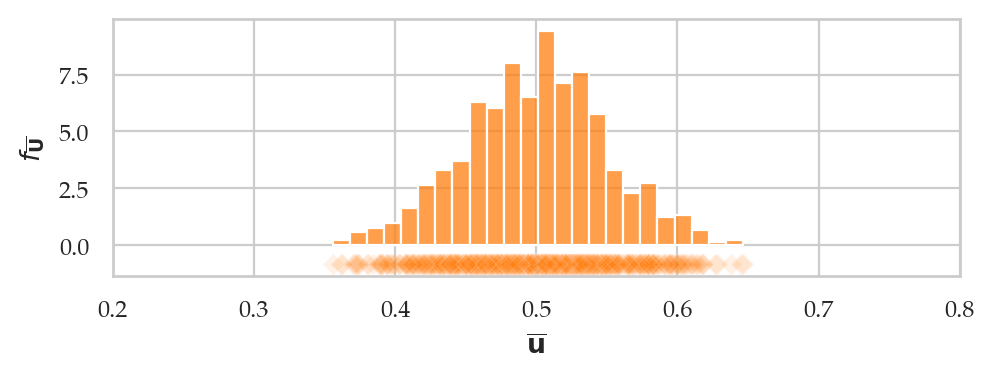

In [15]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Ubar.pdf")
ax = plot_sampling_dist(ubars, xlims=[0.2,0.8], rv_name="U", filename=filename, figsize=(5,2))

We can compute the mean and the variance of the sampling distribution:

### General-purpose generator of sampling distributions

We can make generic function...

In [16]:
def gen_sampling_dist_of_mean(rvX, n, N=1000):
    """
    Generate the sampling distribution of the mean for samples of size `n`
    from the random variable `rvX` based on `N` simulated random samples.
    """
    xbars = []
    for j in range(N):
        xsample = rvX.rvs(n)
        xbar = np.mean(xsample)
        xbars.append(xbar)
    return xbars

In [17]:
ubars2 = gen_sampling_dist_of_mean(rvU, n=30, N=1000)

In [18]:
np.mean(ubars2), np.std(ubars2)

(np.float64(0.49914814703692295), np.float64(0.05322804484536072))

### Example 2 (continued): sampling distribution of the mean

Let's define a random variable `rvZ` $\sim \mathcal{N}(\mu=0, \sigma=1)$.

In [19]:
from scipy.stats import norm
rvZ = norm(0,1)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

Saved figure to figures/prob/random_samples/samples_from_Z.pdf
Saved figure to figures/prob/random_samples/samples_from_Z.png


<Axes: >

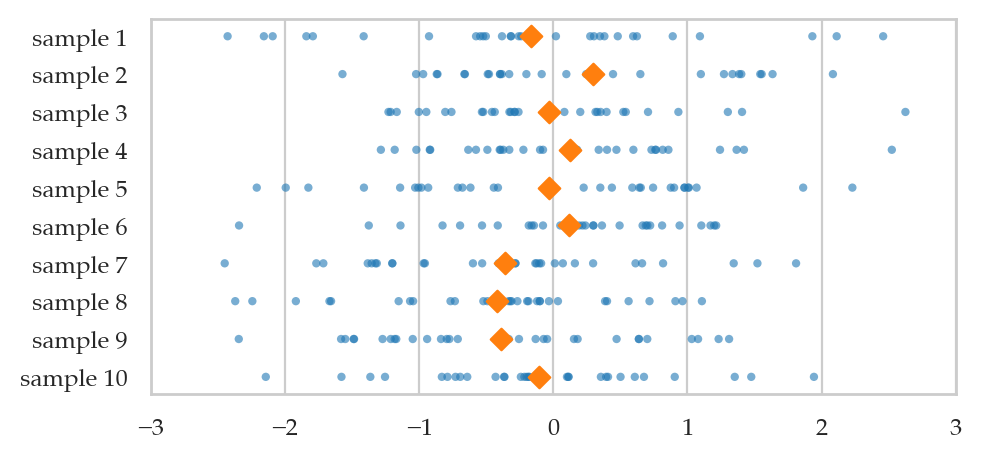

In [20]:
filename = os.path.join(DESTDIR, "samples_from_Z.pdf")
nsamples_df = gen_samples(rvZ, n=30, N=10)
plot_samples(nsamples_df, xlims=[-3,3], filename=filename, figsize=(5,2.4))

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_N$, compute the mean of each sample `zbars` = $[\overline{\mathbf{z}_1}, \overline{\mathbf{z}_2}, \overline{\mathbf{z}_3}, \ldots, \overline{\mathbf{z}_N}]$.

In [21]:
zbars = gen_sampling_dist_of_mean(rvZ, n=30)

We can now plot the combined histog

Saved figure to figures/prob/random_samples/sampling_dist_of_Zbar.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Zbar.png


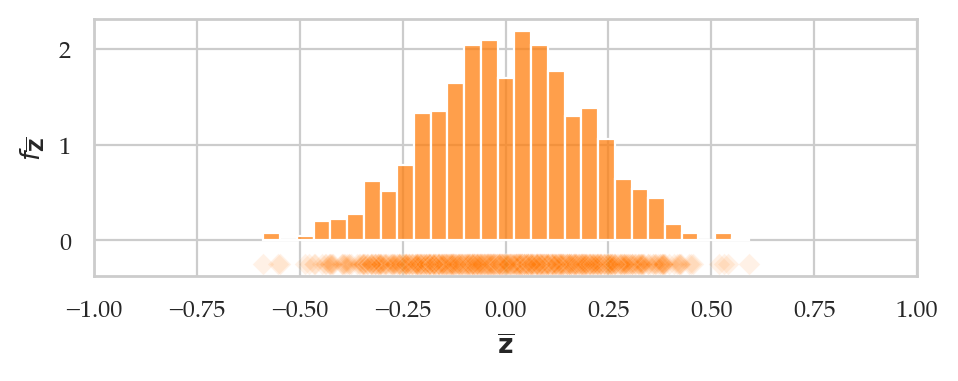

In [22]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Zbar.pdf")
plot_sampling_dist(zbars, xlims=[-1,1], rv_name="Z", filename=filename, figsize=(5,2));

We can compute the mean and the variance of the sampling distribution:

In [23]:
np.mean(zbars), np.std(zbars)

(np.float64(0.004428411583364385), np.float64(0.18812812540770013))

### Example 3 (continued): sampling distribution of the mean

Let's define a random variable `rvE` $\sim \textrm{Expon}(\lambda=0.2)$.

In [24]:
from scipy.stats import expon
lam = 0.2      # lambda
scale = 1/lam
rvE = expon(0, scale)

In [25]:
ebars = gen_sampling_dist_of_mean(rvE, n=30)

Saved figure to figures/prob/random_samples/samples_from_Elambda02.pdf
Saved figure to figures/prob/random_samples/samples_from_Elambda02.png


<Axes: >

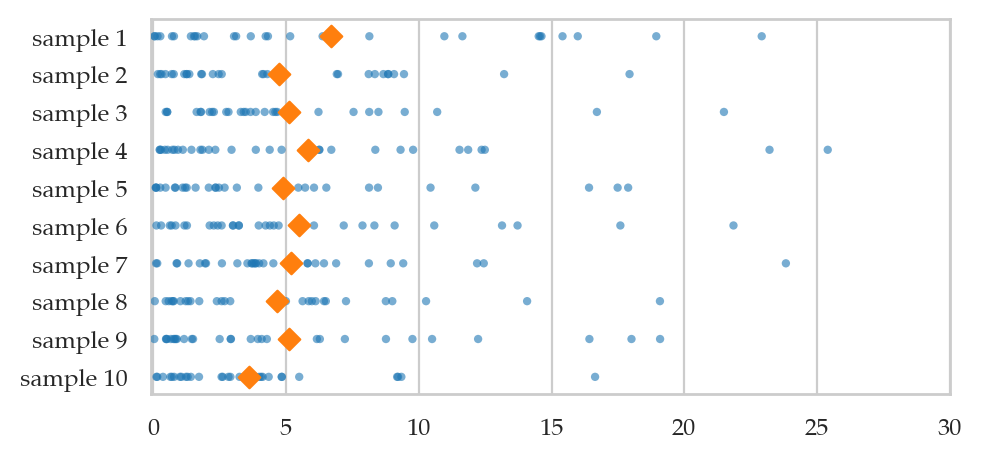

In [26]:
filename = os.path.join(DESTDIR, "samples_from_Elambda02.pdf")
esamples_df = gen_samples(rvE, n=30, N=10)
plot_samples(esamples_df, xlims=[-0.1,30], filename=filename, figsize=(5,2.4))

**Visualizing the sampling distribution of the mean.**  
We will now generate $N=1000$ samples $\mathbf{e}_1, \mathbf{e}_2, \mathbf{e}_3, \ldots, \mathbf{e}_N$, compute the mean of each sample $\overline{\mathbf{e}_1}, \overline{\mathbf{e}_2}, \overline{\mathbf{e}_3}, \ldots, \overline{\mathbf{e}_N}$.

Saved figure to figures/prob/random_samples/sampling_dist_of_Ebar.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Ebar.png


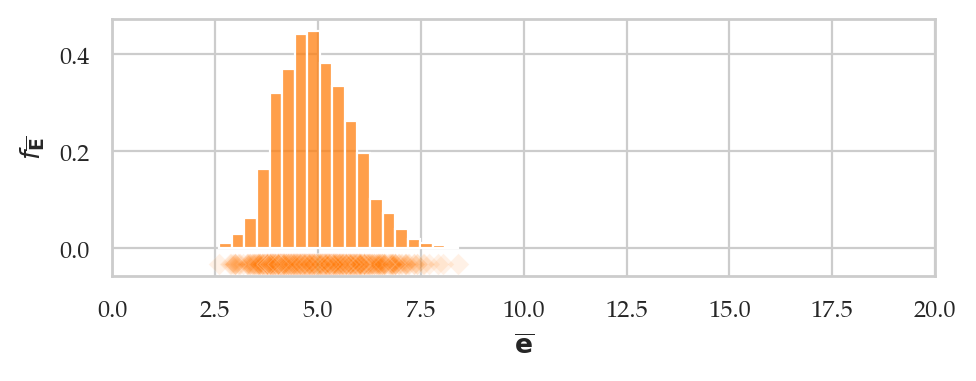

In [27]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Ebar.pdf")
ax = plot_sampling_dist(ebars, xlims=[0,20], rv_name="E", binwidth=0.3, filename=filename, figsize=(5,2))

We can compute the mean and the variance of the sampling distribution:

In [28]:
np.mean(ebars), np.std(ebars)

(np.float64(4.962302475331126), np.float64(0.8891297473521789))

## Central limit theorem

The *Central Limit Theorem* (CLT) is a mathy result tells us two very important practical facts:

1. The sampling distribution of the sample mean $\overline{X}$ is normally distributed for samples taken for ANY random variable, as the sample size $n$ increases.

2. The standard deviation of sampling distribution of the sample mean $\overline{X}$
   decrease $\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$,
   where $\sigma$ is the standard deviation of the random variable $X$.

Let's verify both claims of the CLT by revisiting the sampling distributions we obtained above.

### Example 1 (cont.): sampling distribution as a function of $n$

In [29]:
from scipy.stats import uniform

rvU = uniform(0,1)

Saved figure to figures/prob/random_samples/samples_from_U01_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/samples_from_U01_n10_n30_n100.png


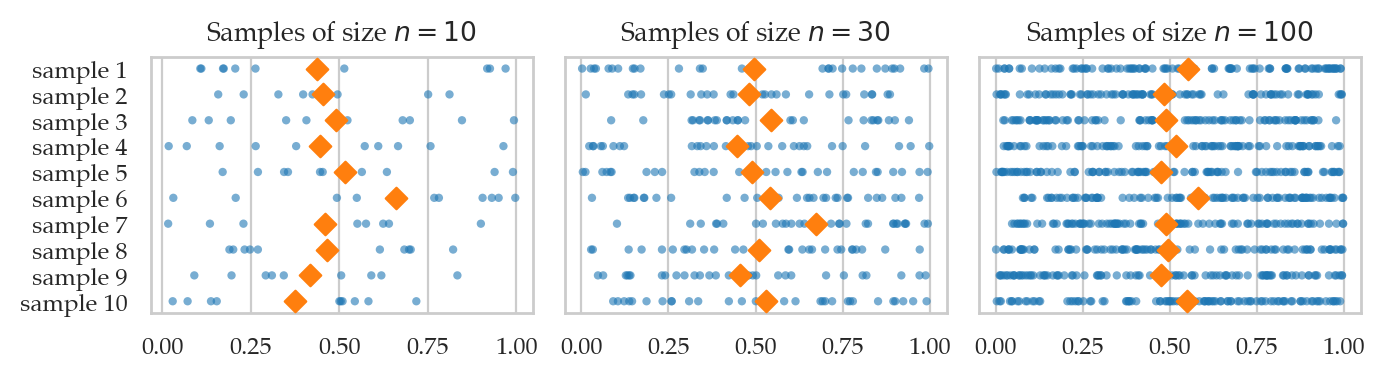

In [30]:
filename = os.path.join(DESTDIR, "samples_from_U01_n10_n30_n100.pdf")
plot_samples_panel(rvU, xlims=None, filename=filename)

Saved figure to figures/prob/random_samples/sampling_dist_of_Ubar_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Ubar_n10_n30_n100.png


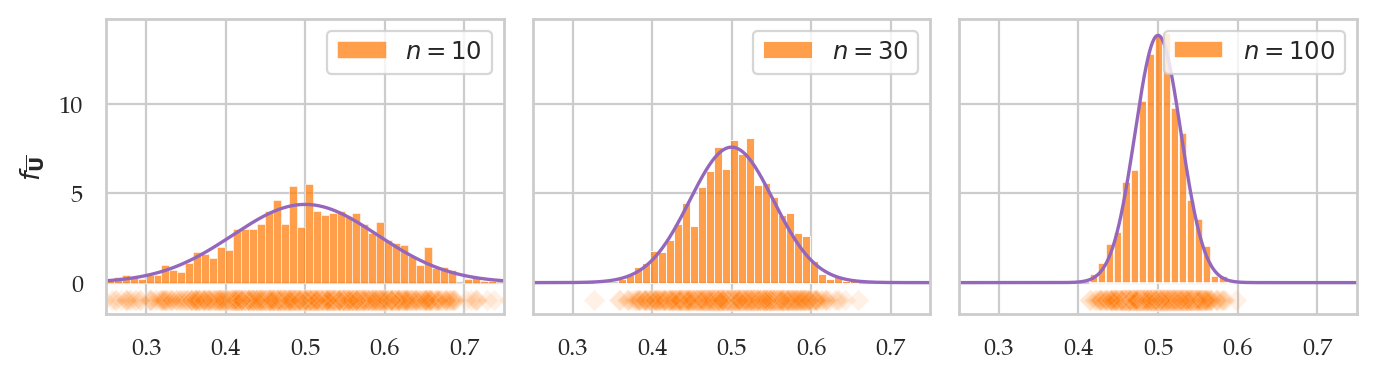

In [31]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Ubar_n10_n30_n100.pdf")
plot_sampling_dists_panel(rvU, rv_name="U", xlims=[0.25,0.75], binwidth=0.01, filename=filename);

### Example 2 (cont.): sampling distribution as a function of $n$

In [32]:
from scipy.stats import norm

mu = 0
sigma = 1
rvZ = norm(mu, sigma)

Saved figure to figures/prob/random_samples/samples_from_Z_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/samples_from_Z_n10_n30_n100.png


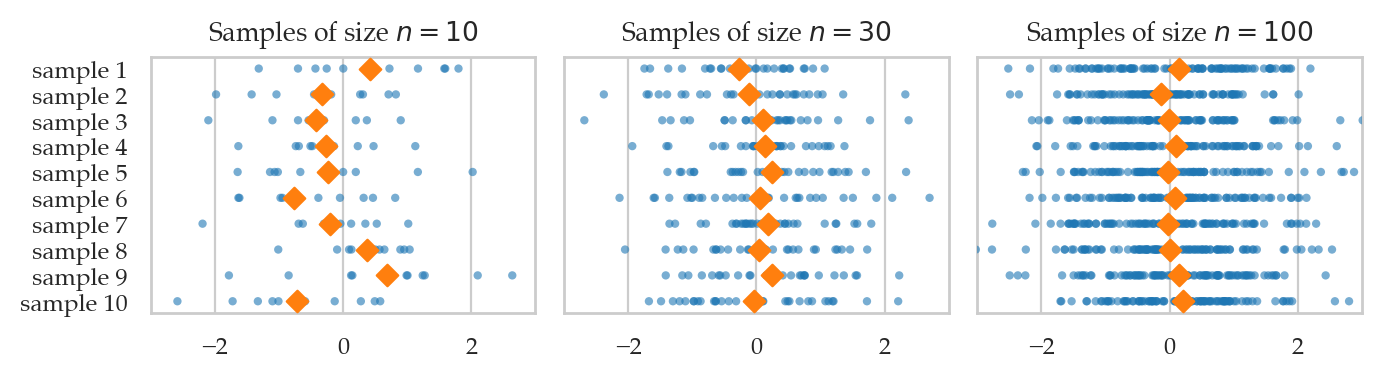

In [33]:
filename = os.path.join(DESTDIR, "samples_from_Z_n10_n30_n100.pdf")
plot_samples_panel(rvZ, xlims=[-3, 3], filename=filename)

Saved figure to figures/prob/random_samples/sampling_dist_of_Zbar_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Zbar_n10_n30_n100.png


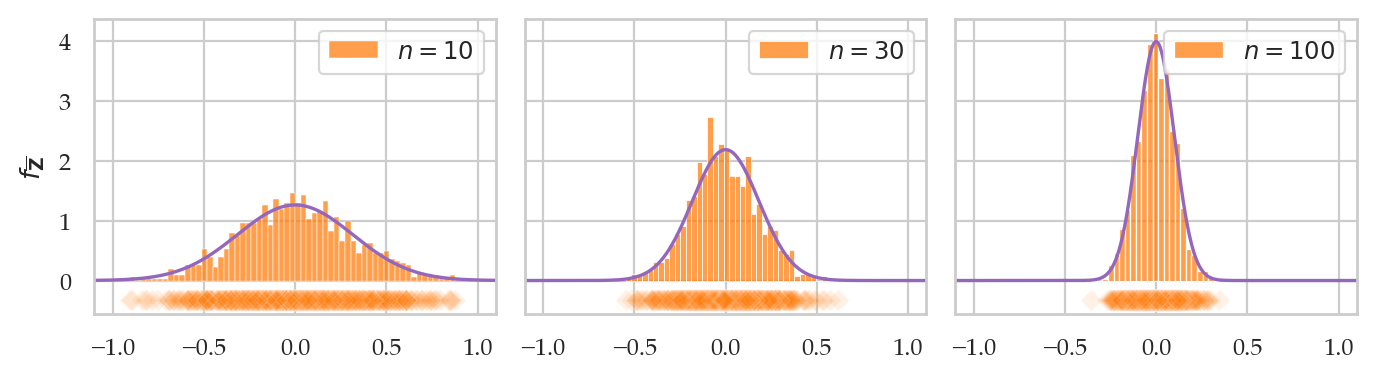

In [34]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Zbar_n10_n30_n100.pdf")
plot_sampling_dists_panel(rvZ, rv_name="Z", xlims=[-1.1, 1.1], binwidth=0.03, filename=filename);

### Example 3 (cont.): sampling distribution as a function of $n$

In [35]:
from scipy.stats import expon

lam = 0.2  # lambda
rvE = expon(loc=0, scale=1/lam)

Saved figure to figures/prob/random_samples/samples_from_Elambda02_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/samples_from_Elambda02_n10_n30_n100.png


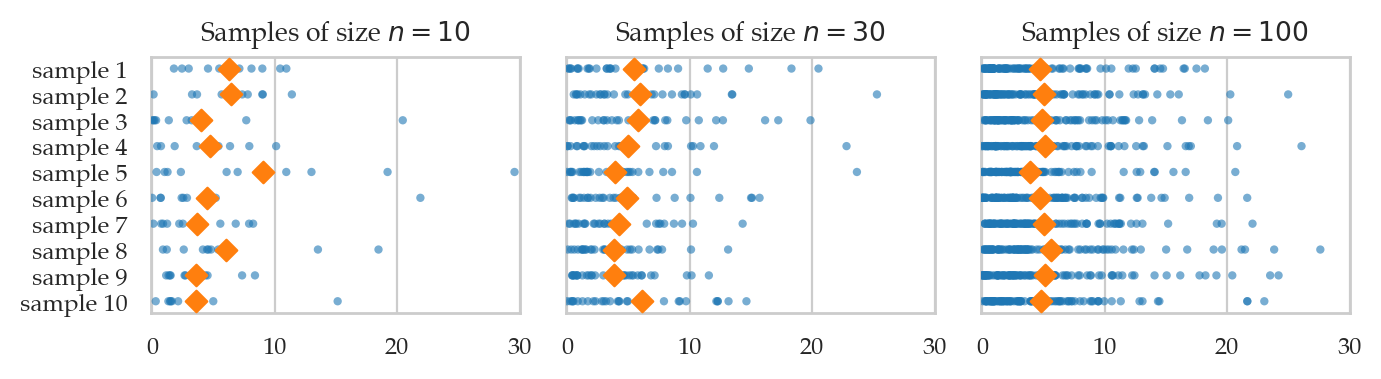

In [36]:
filename = os.path.join(DESTDIR, "samples_from_Elambda02_n10_n30_n100.pdf")
plot_samples_panel(rvE, xlims=[-0.1,30], filename=filename)

Saved figure to figures/prob/random_samples/sampling_dist_of_Ebar_n10_n30_n100.pdf
Saved figure to figures/prob/random_samples/sampling_dist_of_Ebar_n10_n30_n100.png


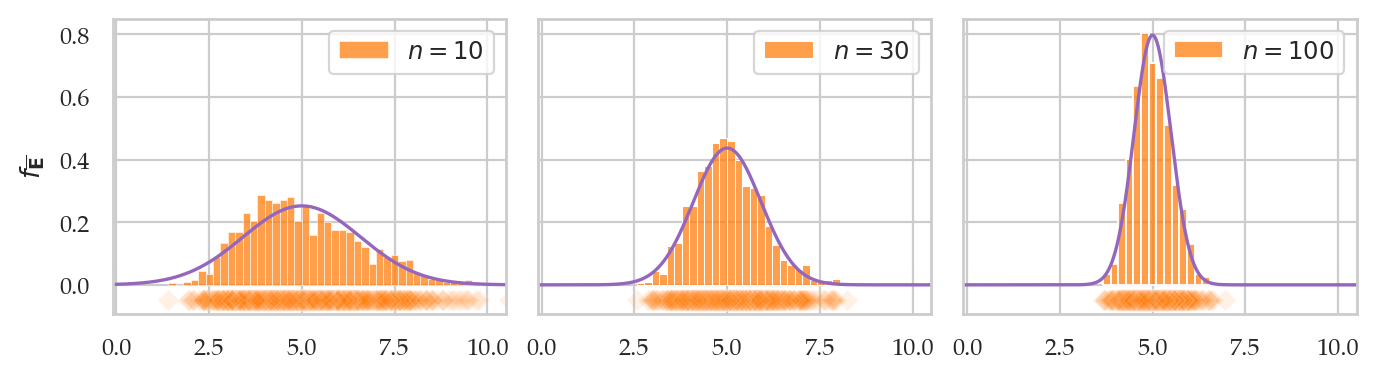

In [37]:
filename = os.path.join(DESTDIR, "sampling_dist_of_Ebar_n10_n30_n100.pdf")
plot_sampling_dists_panel(rvE, rv_name="E", xlims=[-0.1, 10.5], binwidth=0.2, filename=filename);

## Discussion
CLT is the reason why statistics works. We can use properties of sample to estimate the parameters of the population, and our estimates get more and more accurate as the samples get larger.

## Exercises
